<center> <h1> <font color = maroon> Lead Scoring Assignment</maroon> </h1> </center>

# Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they're classified to be a `lead`. Moreover, the company also gets leads through past referrals. 


- Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is `around 30%`. 

 

- Now, although X Education gets a lot of leads, its lead conversion rate is very poor.


_**For ex:** If, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as `‘Hot Leads’`. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone._




 

<h3>Our Task:</h3>

X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around `80%`.

 

<h3>Data</h3>

- We've been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as `Lead Source`, `Total Time Spent on Website`, `Total Visits`, `Last Activity`, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The `target variable`, in this case, is the column `‘Converted’` which tells whether a past lead was converted or not wherein `1` means it was converted and `0` means it wasn’t converted. 



- Another thing that we also need to check out for - **are the levels present in the categorical variables**. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

 

### Goals of the Case Study



Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so we'll need to handle these as well. 

## Step 1: Importing and Merging Data

In [1227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings('ignore')

In [1228]:
# Read Lead.csv data set
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1229]:
# inspecting Rows and columns Number
leads.shape

(9240, 37)

In [1230]:
# check structure/information of given data set
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1231]:
# Describing the numerical summary of the dataset
leads.describe(percentiles=[0.05,0.25,0.75,0.8,0.9,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
80%,641577.600000,1.000000,5.000000,1087.200000,4.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000


**`Inference:`**
Columns TotalVisits and Page Views Per Visit seems to have outliers. Need to Visualize these two columns

Text(0.5, 1.0, 'Box Plot TotalVisits\n')

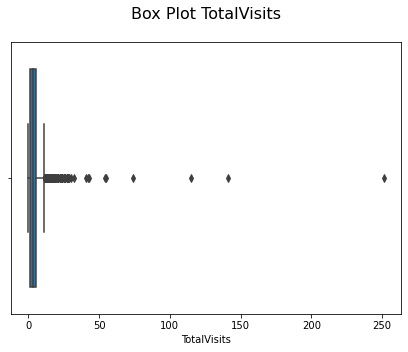

In [1232]:
# plot outliers
plt.figure(figsize=(7,5))
sns.boxplot(leads['TotalVisits'])
plt.title('Box Plot TotalVisits\n',fontdict={'size':16})

Text(0.5, 1.0, 'Box Plot Page Views Per Visit\n')

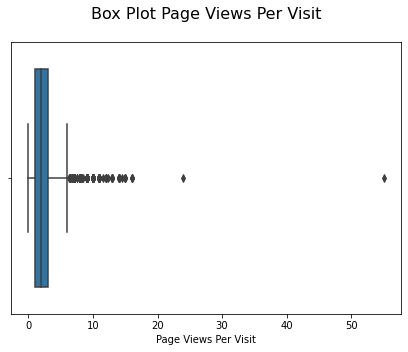

In [1233]:
# plot outliers
plt.figure(figsize=(7,5))
sns.boxplot(leads['Page Views Per Visit'])
plt.title('Box Plot Page Views Per Visit\n',fontdict={'size':16})

## Step 2 : Data Cleaning

We can see value as select in various columns. This implies that for these field there is no selection done hence default value of dropdown is saved in the database. We can treat this value as null.

In [1234]:
# Replacing Select with NAN
leads.replace('Select',np.NAN,inplace=True)
leads.replace('select',np.NAN,inplace=True)
leads.replace('SELECT',np.NAN,inplace=True)


In [1235]:
# checking Null count
leads_null_count = round((leads.isnull().sum()/leads.shape[0])*100,2).reset_index()
leads_null_count.columns = ['columns','count']
leads_null_count.sort_values(by = 'count',ascending=False)

,columns,count
13,How did you hear about X Education,78.46
28,Lead Profile,74.19
25,Lead Quality,51.59
33,Asymmetrique Profile Score,45.65
32,Asymmetrique Activity Score,45.65
30,Asymmetrique Activity Index,45.65
31,Asymmetrique Profile Index,45.65
29,City,39.71
12,Specialization,36.58
24,Tags,36.29


In [1236]:
# checking Null count
leads_null_count = round((leads.isnull().sum()/leads.shape[0])*100,2).reset_index()
leads_null_count.columns = ['columns','count']
leads_null_count.sort_values(by = 'count',ascending=False)


,columns,count
13,How did you hear about X Education,78.46
28,Lead Profile,74.19
25,Lead Quality,51.59
33,Asymmetrique Profile Score,45.65
32,Asymmetrique Activity Score,45.65
30,Asymmetrique Activity Index,45.65
31,Asymmetrique Profile Index,45.65
29,City,39.71
12,Specialization,36.58
24,Tags,36.29


- **Remove columns with high missing value percentage** **`>40%`**

**`Inference:`** We're considering all those columns having missing values greater than 40% because our inference says that we need to drop these columns since these columns will not help in building model.

In [1237]:
# dropping columns having null values more than 40 percent
leads = leads.drop(list(leads_null_count[(leads_null_count['count']>40)]['columns']),axis = 1)

In [1238]:
# checking Null count >40%
leads_null_count = round((leads.isnull().sum()/leads.shape[0])*100,2).reset_index()
leads_null_count.columns = ['columns','count']
leads_null_count.sort_values(by = 'count',ascending=False)
leads_null_count[(leads_null_count['count']>40)]

,columns,count


In [1239]:
leads.shape

(9240, 30)

- **Columns having null values 3% - 40%**

In [1240]:
# lets see the null percentage between 3 to 40
leads_null_count[(leads_null_count['count']>3) & (leads_null_count['count']<=40)]

,columns,count
11,Country,26.63
12,Specialization,36.58
13,What is your current occupation,29.11
14,What matters most to you in choosing a course,29.32
23,Tags,36.29
26,City,39.71


**`Inference:`** We can see City and Country will give same inferences. so we can straight away drop one of these columns. 

In [1241]:
# We are dropping country columns eventually country can be infered from city

leads.drop(['Country'],axis = 1,inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


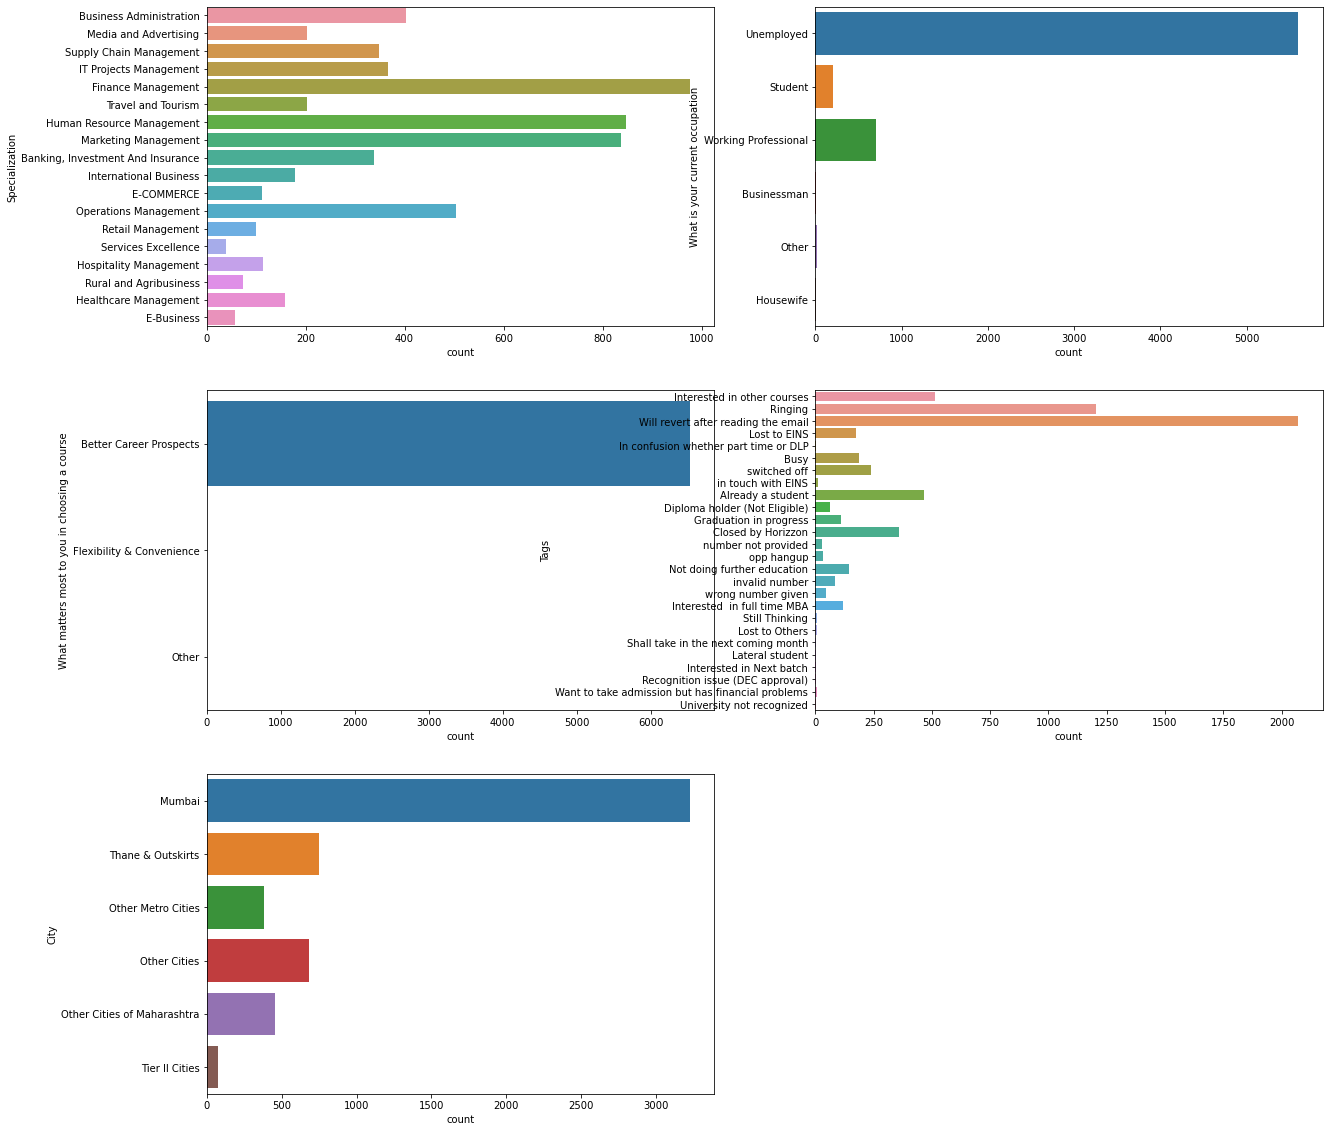

In [1242]:
# lets visualize columns between 3 to 40 percent null values in count plot
plt.figure(figsize = (20,20))

cols = ['Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City']

for row in enumerate(cols):    
    plt.subplot(math.ceil(len(cols)/2),2,row[0]+1)
    sns.countplot(y=row[1],data = leads)
plt.show()

**`Inference:`** 

- We can see data for column `What matters most to you in choosing a course` is highly skewed to category `Better Career Prospects` category. This column is insignficant for model. Hence we can drop this.


- Also we can see categories of `Tags` are not putting significance to our model. So we can drop this column as well.

In [1243]:
# with above inference dropping 'What matters most to you in choosing a course' and 'Tags' columns

leads.drop(['What matters most to you in choosing a course','Tags'],axis = 1, inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [1244]:
leads.shape

(9240, 27)

### Imputation


**`Inference:`**

Since computing null values as `mode` may cause change in converted ratio for particular feature rather we create new category 
`Other` for Specialization and assign existing value `Other` for occupation and `Other Cities` for City.


In [1245]:
# Lets impute null values for 3 columns 'City','Specialization','What is your current occupation'

leads['City'] = leads['City'].fillna('Other Cities')
leads['Specialization'] = leads['Specialization'].fillna('Other')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Other')

In [1246]:
#check null values between 3 to 40 percentage
leads_null_count = round((leads.isnull().sum()/leads.shape[0])*100,2).reset_index()
leads_null_count.columns = ['columns','count']
leads_null_count.sort_values(by = 'count',ascending=False)
leads_null_count[(leads_null_count['count']>3) & (leads_null_count['count']<=40)]

,columns,count


- **Columns having null values 0% - 3%**

In [1247]:
# Lets check columns with null values between 0 to 3 percent
leads_null_count[(leads_null_count['count']>0) & (leads_null_count['count']<=3)]

,columns,count
3,Lead Source,0.39
7,TotalVisits,1.48
9,Page Views Per Visit,1.48
10,Last Activity,1.11


In [1248]:
# Lets check row wise null percentage for above columns
max(leads[list(leads_null_count[(leads_null_count['count']>0) & (leads_null_count['count']<=3)]['columns'])].isnull().sum(axis = 1)[leads[list(leads_null_count[(leads_null_count['count']>0) & (leads_null_count['count']<=3)]['columns'])].isnull().sum(axis = 1)>1]/leads.shape[1]*100)

14.814814814814813

**`Inference:`** Here we can see the maximum percentage row wise null is 14 percentage. we can compute these value as mode/median to preserve not null feature 

In [1249]:
# computing null as  mode for categorical and median for numeric variable having null value less than 3 percentage
leads['TotalVisits']  = leads['TotalVisits'].fillna(np.nanpercentile(leads['TotalVisits'],50))
leads['Page Views Per Visit']  = leads['Page Views Per Visit'].fillna(np.nanpercentile(leads['Page Views Per Visit'],50))
leads['Lead Source']  = leads['Lead Source'].fillna(str(leads['Lead Source'].mode()))
leads['Last Activity']  = leads['Last Activity'].fillna(str(leads['Last Activity'].mode()))


In [1250]:
#check null values
round((leads.isnull().sum()/leads.shape[0])*100,2).reset_index()

,index,0
0,Prospect ID,0.0
1,Lead Number,0.0
2,Lead Origin,0.0
3,Lead Source,0.0
4,Do Not Email,0.0
5,Do Not Call,0.0
6,Converted,0.0
7,TotalVisits,0.0
8,Total Time Spent on Website,0.0
9,Page Views Per Visit,0.0


### Checking for outliers

In [1251]:
# check percentile distribution for numerical data 
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


**`Inference:`** We can see columns `Totalvisit` and `Page Views Per Visit` has outliers.Value looks good till 99 percentile, 
Let's cap value to 99 percentile values for both the columns.

In [1252]:
# cap outliers to 99 percentile value
leads['TotalVisits'][leads['TotalVisits'] > np.percentile(leads['TotalVisits'],99)] =  np.percentile(leads['TotalVisits'],99)
leads['Page Views Per Visit'][leads['Page Views Per Visit'] > np.percentile(leads['Page Views Per Visit'],99)] =  np.percentile(leads['Page Views Per Visit'],99)

In [1253]:
# check percentile distribution for numerical data
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.327814,487.698268,2.329050
std,23405.995698,0.486714,3.228466,548.021466,1.971347
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


**`Inference:`** Now we can observe after capping, max value of the columns `TotalVisits` and `Page Views Per Visit` are in the range of 99 percentile.Hence, outliers treatment are done.

- **Checking final Row percentage**

Finally check the percentage of rows retained in data cleaning process **(Rows after cleaning/total rows)*100**.
- Initially we had dimension `(9240, 37)`


In [1254]:
#checking row percentage
(leads.shape[0]/9240)*100

100.0

**`Inference`** Since the rows percentage comes out to be 100%.Hence, we retained all the rows after data cleaning because we didn't drop any rows rather we imputed the missing values accordingly.

## Step 3: Data Visualization

In [1255]:
# Lets create different variable for continuous, categorical and Boolean columns

leads_continuous_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads_categorical_col = leads.columns[~leads.columns.isin(['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Lead Number','Converted','Prospect ID'])]

- **For Continuous Variables:**

<Figure size 1440x1080 with 0 Axes>

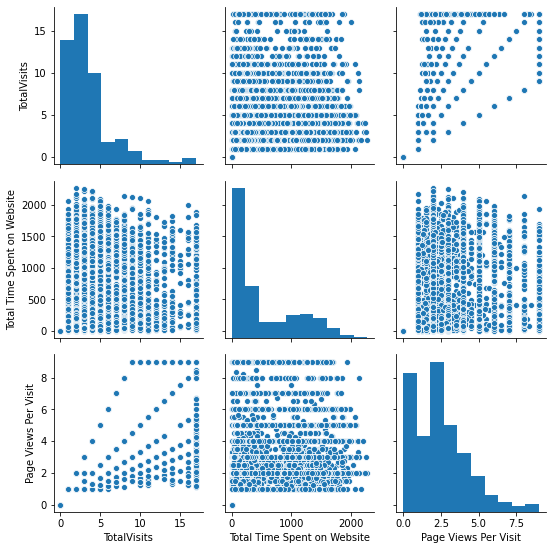

In [1256]:
# Plot continuous variables
plt.figure(figsize=(20,15))
sns.pairplot(leads[leads_continuous_col])
plt.show()

**`Inference:`**  we can see variable TotalVisit has some correlation with variable Page Views Per Visit.

- **For Categorical Variables:**

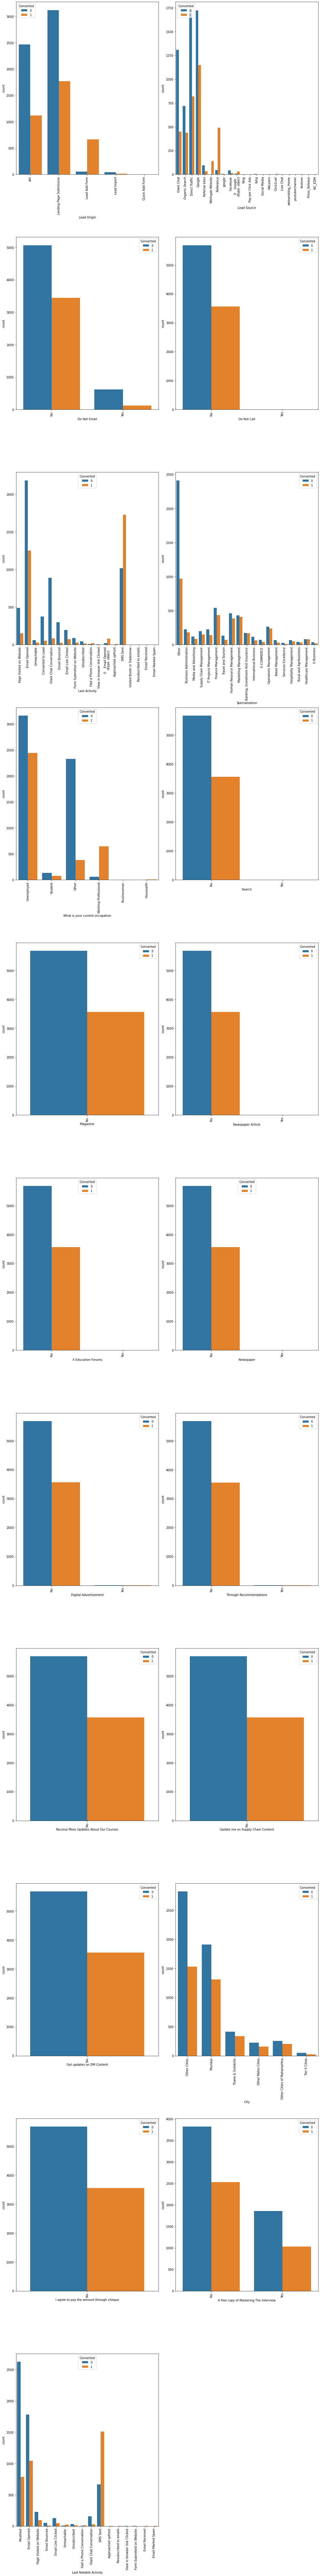

In [1257]:
# plot Categorical variables

plt.figure(figsize = (15,120))

for row in enumerate(leads_categorical_col):    
    plt.subplot(math.ceil(len(leads_categorical_col)/2),2,row[0]+1)
    sns.countplot(x=row[1],hue='Converted',data = leads)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**`Inferences:`** 
- We can see variable `Magazine`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, ` Get updates in DM Content`, `I agree to pay the amount through cheque` has only one boolean value as `No`. So, these columns are insignificant for the model.Hence, we can drop these variables.


- Similarly variables `Do Not Call`,`Do Not Email`,`Search`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations` also have `Yes` value count near to 0. Hence, we can also drop these variables.


- Variables `Lead Origin Lead Add Form`, `Lead Source Welingak Website`, `What is your current occupation Unemployed`, `Working Professional`, `City Mumbai` has good impact on potential lead.

## Step 4: Data Preparation 

In [1258]:
# we can see variable Lead Source is having redundant values, we need fix these value
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', '0    Google\ndtype: object', 'blog',
       'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [1259]:
# We can see redudant values google,Google, 0    Google\ndtype: object. We can replece these value with Google
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('0    Google\ndtype: object','Google')

In [1260]:
# Obtained unique values for Lead Source
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [1261]:
# Dropping columns considering Data visualization inference
leads.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis = 1, inplace=True)
leads.drop([ 'Do Not Call','Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'],axis = 1, inplace=True)

In [1262]:
# columns Prospect ID and Lead Number represents unique serial value to the prospect and leads. hence donot have any significance 
#in our model. we can drop these 2 variables.
leads.drop(['Prospect ID','Lead Number'],axis = 1, inplace=True)

## Sales Team Generated Data

- Tags
- Lead Quality
- Asymmetric activity index
- Asymmetric Profile index
- Asymmetric activity score
- Asymmetric profile score
- Last Activity
- Last Notable Activity
- Lead Profile

**NOTE:** There are some columns maintained by Sales team to save prospects reaction, response, status etc.
- 
We have already dropped most of the Sales team generated columns while EDA. Now, we are left with only 2 sales team generated columns.

### Dropping Sales Team Generated Data:



- These columns will not give any significance to the model since we are building a model to identify potential customers using prospects input.


- `Last_Activity` and `Last Notable`  includes the prospect behaviour hence these are sales team maintained columns.We can drop these columns.


In [1263]:
# dropping sales team generated columns
leads.drop(['Last Notable Activity','Last Activity'],axis=1,inplace=True)

In [1264]:
# re-checking data set dimension
leads.shape

(9240, 10)

### Converting some binary variables (Yes/No) to 0/1

In [1265]:
# list binary variable left
binary_var = ['A free copy of Mastering The Interview']
leads[binary_var] = leads[binary_var].apply(lambda x: x.map({'Yes':1,'No':0}))
leads[binary_var].head()

,A free copy of Mastering The Interview
0,0
1,0
2,1
3,0
4,0


### Get dummies for categorical variables

In [1266]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Other,Unemployed,Other Cities,0
1,API,Organic Search,0,5.0,674,2.5,Other,Unemployed,Other Cities,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Other,Unemployed,Mumbai,0


In [1267]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
categorical_vars = ['Lead Source','Specialization','What is your current occupation']
dummy1 = pd.get_dummies(leads[categorical_vars], drop_first=True)

dummy2 = pd.get_dummies(leads['City'],prefix = 'City')
dummy2.drop('City_Other Cities',axis=1 , inplace=True)
dummy1 = pd.concat([dummy1, dummy2], axis=1)

dummy2 = pd.get_dummies(leads['Lead Origin'],prefix = 'Lead Origin')
dummy2.drop('Lead Origin_Quick Add Form',axis=1 , inplace=True)
dummy1 = pd.concat([dummy1, dummy2], axis=1)


# # Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)


leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,...,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,API,Olark Chat,0,0.0,0,0.0,Other,Unemployed,Other Cities,0,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Other,Unemployed,Other Cities,0,...,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,...,0,1,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,...,0,1,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Other,Unemployed,Mumbai,0,...,0,1,0,0,0,0,0,1,0,0


In [1268]:
# Checking shape of data set after Dummification
leads.shape

(9240, 61)

In [1269]:
# Listing columns adter dummification
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management'

In [1270]:
# Dropping original Categorical columns after Dummification.
leads.drop(categorical_vars,axis=1,inplace=True)
leads.drop(['City','Lead Origin'],axis=1,inplace=True)

In [1271]:
leads.shape

(9240, 56)

### Visualize Correlation

In [1272]:
# check the correlation among all the variables that are obtained after dummification
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
Converted,1.000000,0.043716,0.362483,-0.004603,-0.039820,-0.080682,-0.023695,0.026286,0.018581,0.013138,...,0.313837,0.031392,0.025513,0.009576,0.039189,-0.008779,-0.120822,-0.051236,0.321702,-0.023695
TotalVisits,0.043716,1.000000,0.324556,0.706203,0.280920,0.119074,-0.043159,0.171096,-0.015167,0.011834,...,-0.001191,0.252808,0.053680,0.068444,0.094712,0.020213,-0.281352,0.408685,-0.237099,-0.044902
Total Time Spent on Website,0.362483,0.324556,1.000000,0.336715,0.168298,0.132926,-0.033930,0.199839,-0.013095,0.008416,...,0.099241,0.168610,0.066759,0.051112,0.074099,0.020840,-0.201239,0.276009,-0.139681,-0.034926
Page Views Per Visit,-0.004603,0.706203,0.336715,1.000000,0.292589,0.146086,-0.048604,0.223175,-0.017385,-0.003056,...,-0.008192,0.284060,0.086824,0.097670,0.094629,0.033293,-0.371352,0.520359,-0.279637,-0.051459
A free copy of Mastering The Interview,-0.039820,0.280920,0.168298,0.292589,1.000000,0.598655,-0.052178,-0.316310,-0.009921,-0.007015,...,-0.005856,0.295400,0.110010,0.173103,0.046930,0.073007,-0.475875,0.569633,-0.180893,-0.052178
Lead Source_Direct Traffic,-0.080682,0.119074,0.132926,0.146086,0.598655,1.000000,-0.047684,-0.417704,-0.009067,-0.006411,...,-0.013047,0.223349,0.104188,0.111553,0.058524,0.069690,-0.435365,0.528303,-0.178865,-0.047684
Lead Source_Facebook,-0.023695,-0.043159,-0.033930,-0.048604,-0.052178,-0.047684,1.000000,-0.052454,-0.001139,-0.000805,...,-0.011664,0.014234,0.118616,0.005229,-0.012742,-0.006953,-0.061542,-0.079155,-0.022461,0.981709
Lead Source_Google,0.026286,0.171096,0.199839,0.223175,-0.316310,-0.417704,-0.052454,1.000000,-0.009974,-0.007052,...,-0.019533,0.128415,-0.010614,-0.069976,0.059869,-0.037377,0.014789,0.082512,-0.167161,-0.049425
Lead Source_Live Chat,0.018581,-0.015167,-0.013095,-0.017385,-0.009921,-0.009067,-0.001139,-0.009974,1.000000,-0.000153,...,-0.004232,-0.010766,-0.003356,-0.003047,-0.004380,-0.001322,-0.011702,-0.015587,0.050691,-0.001139
Lead Source_NC_EDM,0.013138,0.011834,0.008416,-0.003056,-0.007015,-0.006411,-0.000805,-0.007052,-0.000153,1.000000,...,-0.002992,0.014218,-0.002373,-0.002155,-0.003097,-0.000935,-0.008274,0.009821,-0.003020,-0.000805


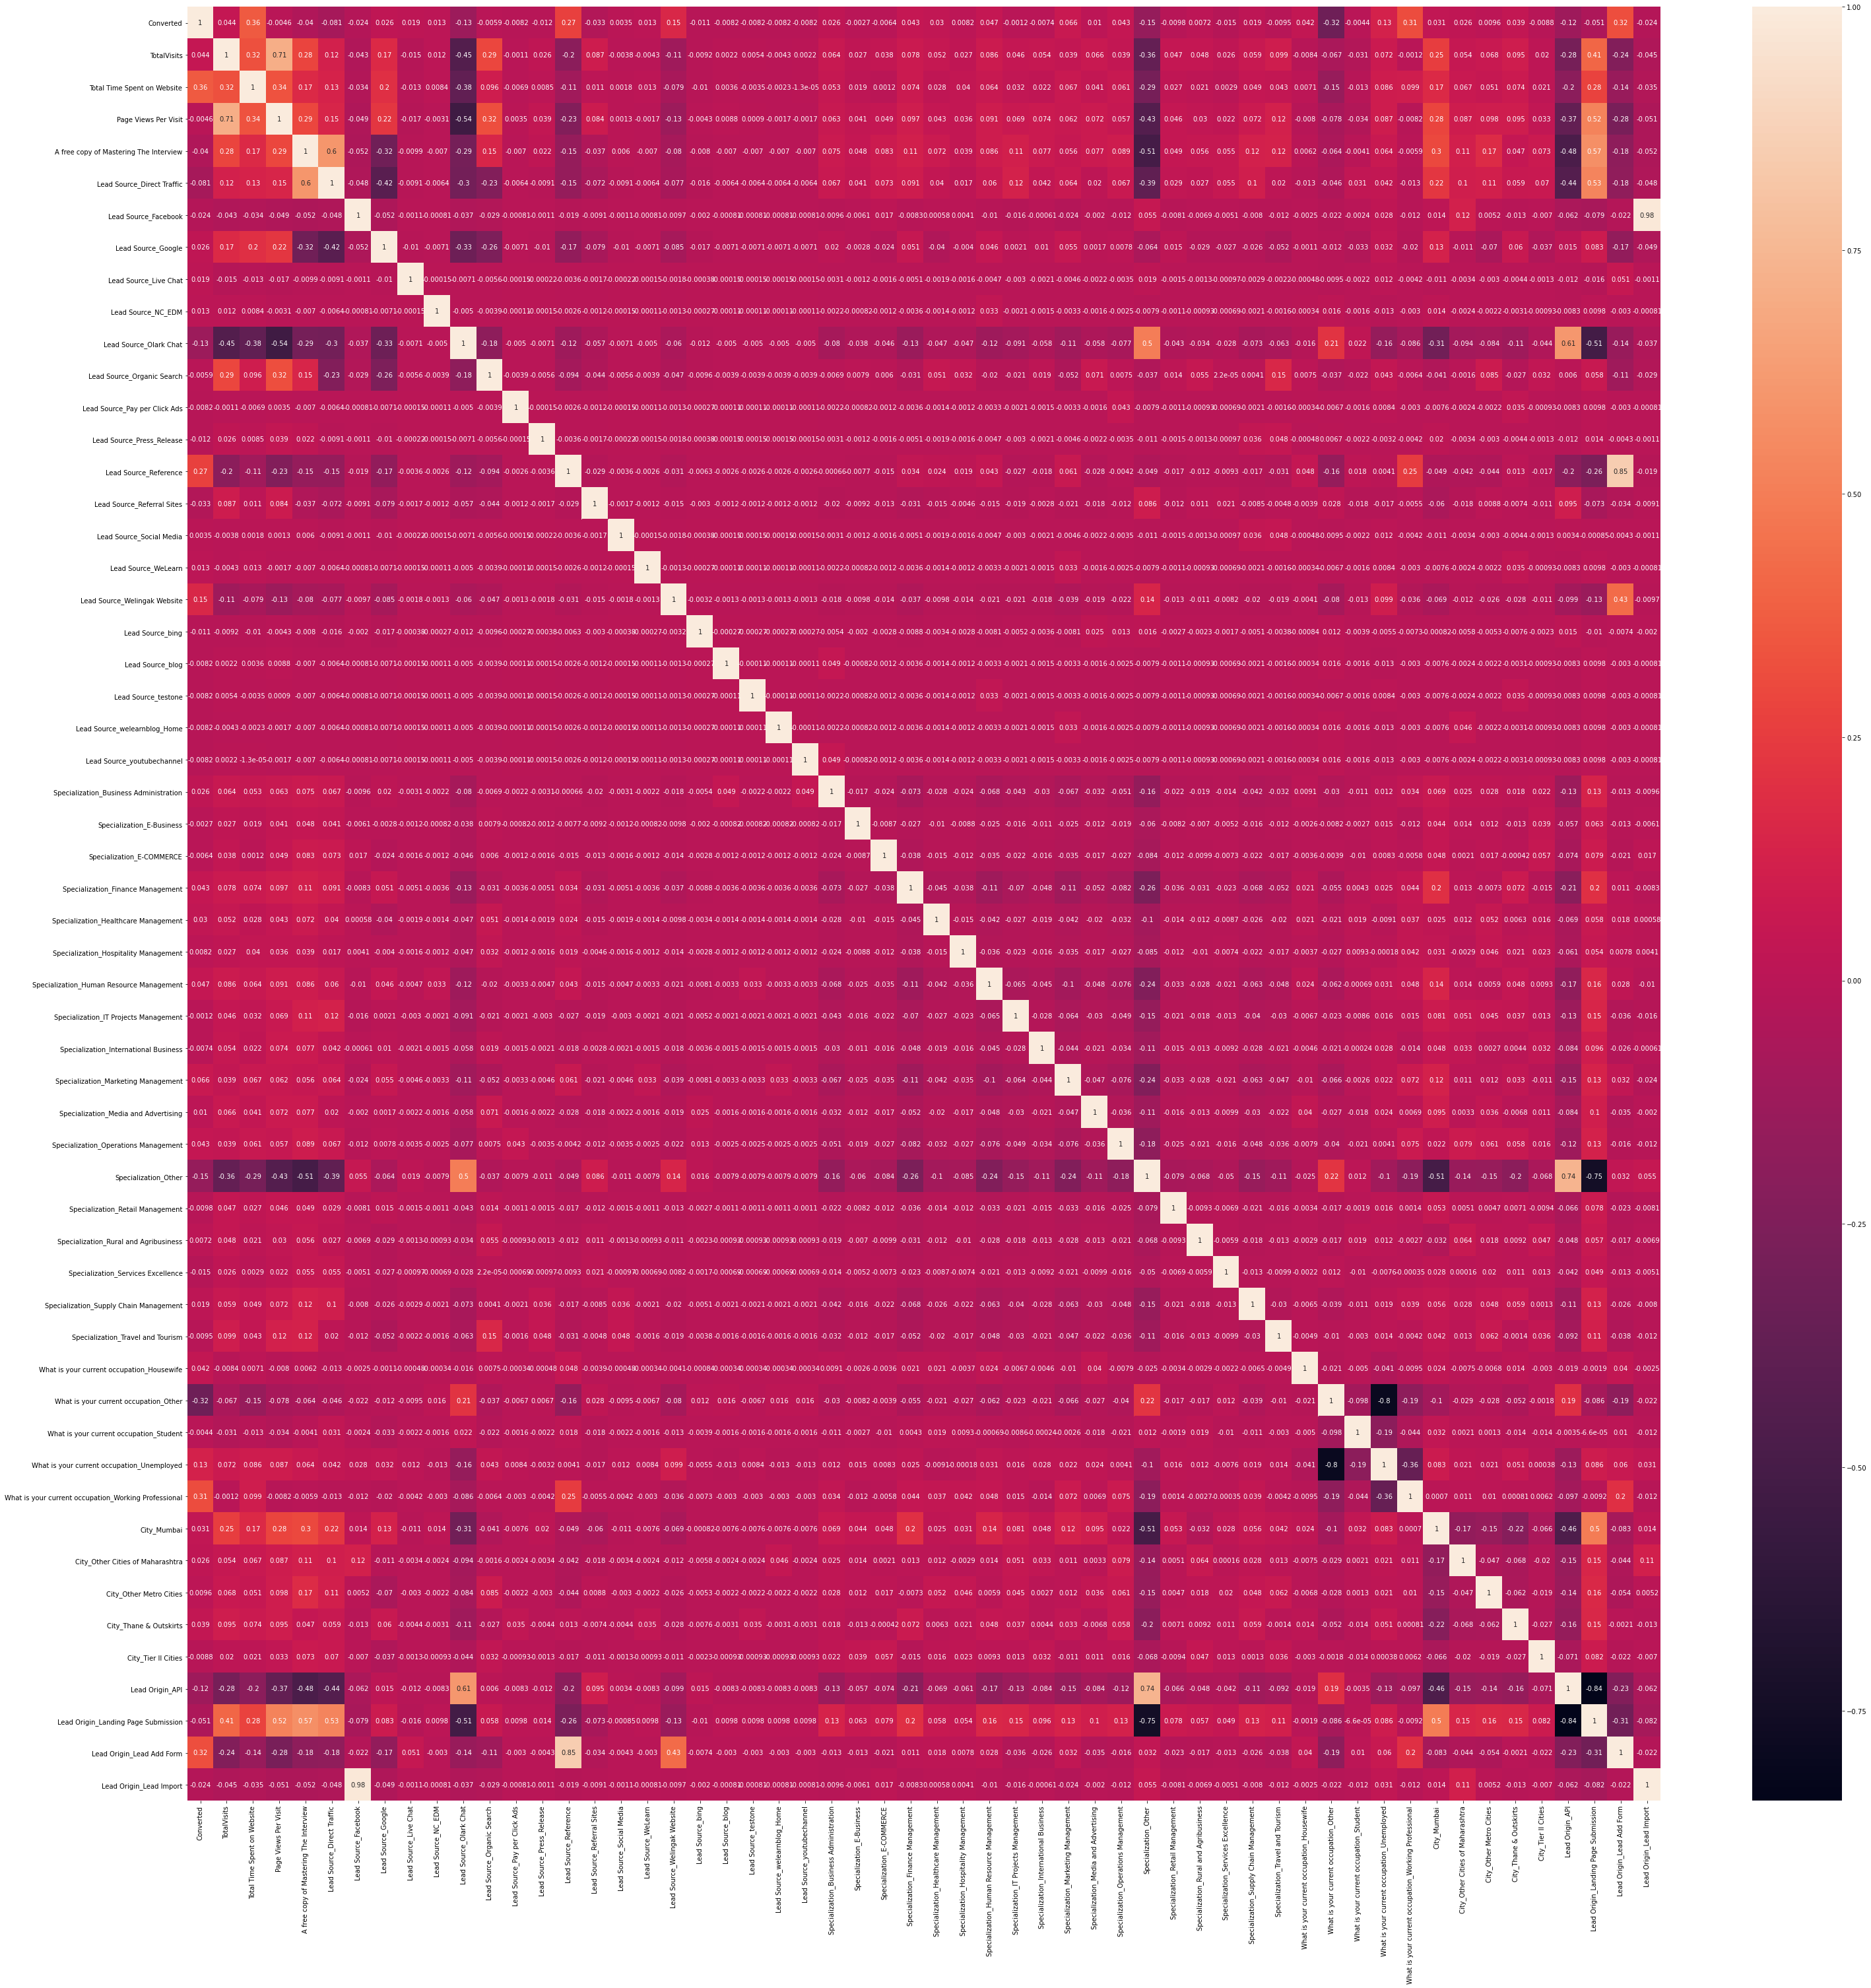

In [1273]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

**`Inference:`** We can see some columns having high correlation like `Specialization_other`,`Lead Source_Reference`,`Lead Source_Olerk Chat`, `Lead Origin_Lead Add Form`.  we can remove these columns.

In [1274]:
# Dropping columns with high correlation.
leads.drop(['Specialization_Other','Lead Source_Olark Chat','What is your current occupation_Other'], axis = 1, inplace = True)

## Train Test Split

In [1275]:
# Putting independent features to x variable
X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,...,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [1276]:
# Putting dependent variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1277]:
# Splitting the data into train and test, we specify this so that train and test data set always have the same rows, respec.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1278]:
#checking and printing splitted data frame dimensions
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (6468, 52)
X_test shape : (2772, 52)
y_train shape : (6468,)
y_test shape : (2772,)


## Feature Scaling 

In [1279]:
# 1. instantiate/create an object
scaler = StandardScaler()

# 2. Apply scaler() to all the columns except the '0/1' and 'dummy' vars i.e. create a list of numeric variables & fit on data
X_train[leads_continuous_col] = scaler.fit_transform(X_train[leads_continuous_col])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,...,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8105,0.512365,1.365219,1.364995,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1280]:
# checking dimension of X_train data set
X_train.shape

(6468, 52)

In [1281]:
# Checking the Conversion Rate
(sum(leads['Converted'])/len(leads['Converted'].index))*100


38.53896103896104

**`Inference:` Data set has 38 % converted data**

## Step 5: Model Building 


### Feature Selection Using RFE

In [1282]:
# Selecting 25 feature initially to preserve important features.
logreg = LogisticRegression()
rfe = RFE(logreg, 25)
rfe = rfe.fit(X_train, y_train)

In [1283]:
# checking RFE Supported feature
rfe.support_

array([False,  True, False, False,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True,  True])

In [1284]:
# listing RFE supported Features along with their Ranking/Priority of selection.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 9),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 8),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 25),
 ('Lead Source_WeLearn', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_blog', False, 10),
 ('Lead Source_testone', False, 28),
 ('Lead Source_welearnblog_Home', False, 15),
 ('Lead Source_youtubechannel', False, 17),
 ('Specialization_Business Administration', False, 5),
 ('Specialization_E-Business', False, 6),
 ('Specialization_E-COMME

In [1285]:
# Assigning RFE Supported variable to col variable
col = X_train.columns[rfe.support_]

In [1286]:
# Listing columns not Supported by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Live Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Mumbai',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

In [1287]:
# Listing Columns supported by RFE Stored in variable col
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import'],
      dtype='obje

### Reusable function to build multiple models:

In [1288]:
# Writing consolidated function which can be reused to build multiple model. It accepts column list for which model is to be build.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None
def build_model(col):
    # Biuld a model using selected columns
    X_train_sm = sm.add_constant(X_train[col])
    Log_Model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = Log_Model.fit()
    print(res.summary())
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif, end='\n'+'='*78+'\n')
    
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
    y_train_pred_final['Lead_ID'] = y_train.index
    
    # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
    y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
    # Let's check the overall accuracy.
    print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
    print('='*78)
   
    # Let's take a look at the confusion matrix again 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
    draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
    return res,y_train_pred_final,confusion
    

### Building 1st model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.7
Date:                Thu, 17 Jun 2021   Deviance:                       5813.5
Time:                        18:22:57   Pearson chi2:                 7.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

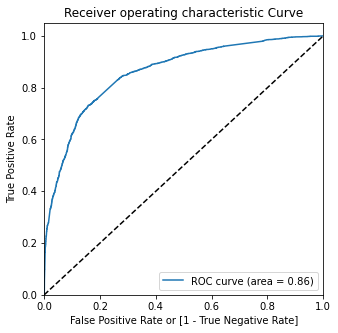

In [1289]:
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** 

- We can see columns `Lead Origin_Lead Import` and `Lead Source_Facebook` have high VIF value. 


- Also p-value of columns `Lead Source_NC_EDM` ,`Lead Origin_API` ,`Lead Origin_Landing Page Submission` is very high. 


- We will first go with VIF and remove feature `Lead Origin_Lead Import` from the model.

### 2nd  model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.8
Date:                Thu, 17 Jun 2021   Deviance:                       5813.6
Time:                        18:22:58   Pearson chi2:                 7.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

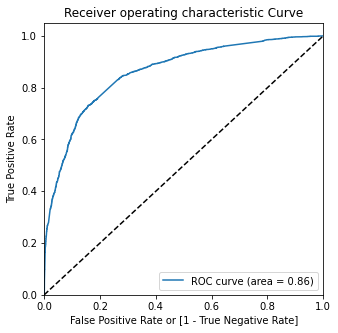

In [1290]:
col = col.drop('Lead Origin_Lead Import')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** 

- We can see column `Lead Origin_Landing Page Submission` is having high Vif. 


- And column `Lead Source_NC_EDM` has high p-value. Try dropping high VIF column.

### 3rd Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.8
Date:                Thu, 17 Jun 2021   Deviance:                       5813.6
Time:                        18:22:59   Pearson chi2:                 7.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

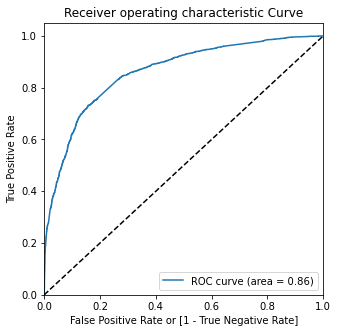

In [1291]:
col = col.drop('Lead Origin_Landing Page Submission')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** Now VIF is in normal range for all columns. But p-value for `Lead Source_NC_EDM` is still high. We can drop this column.

### 4th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.7
Date:                Thu, 17 Jun 2021   Deviance:                       5815.4
Time:                        18:23:00   Pearson chi2:                 7.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

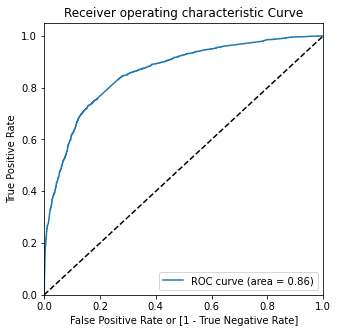

In [1292]:
col = col.drop('Lead Source_NC_EDM')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** P-value of `Lead Source_Press_Release` is high. Lets drop this column and rebuild model.

### 5th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.1
Date:                Thu, 17 Jun 2021   Deviance:                       5818.2
Time:                        18:23:01   Pearson chi2:                 7.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

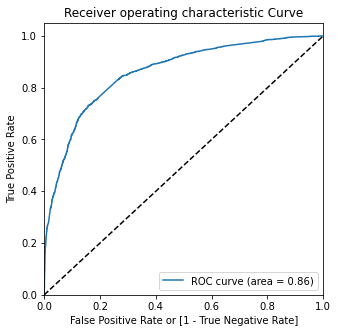

In [1293]:
col = col.drop('Lead Source_Press_Release')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** P-value of column `What is your current occupation_Housewife` is high, we can drop this column.

### 6th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2918.8
Date:                Thu, 17 Jun 2021   Deviance:                       5837.6
Time:                        18:23:01   Pearson chi2:                 7.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

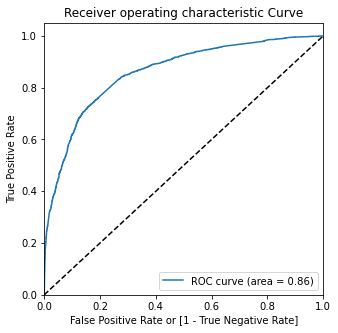

In [1294]:
col = col.drop('What is your current occupation_Housewife')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** 

- Column `Specialization_Media and Advertising` has p-value more than 0.05.

- Let's try dropping this column and rebuild model.

### 7th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2920.3
Date:                Thu, 17 Jun 2021   Deviance:                       5840.5
Time:                        18:23:02   Pearson chi2:                 7.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

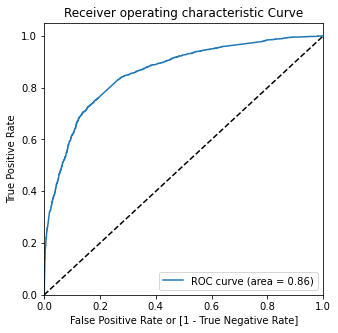

In [1295]:
col = col.drop('Specialization_Media and Advertising')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** Column `Lead Origin_API` is having p-value more than 0.05. 

### 8th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2921.5
Date:                Thu, 17 Jun 2021   Deviance:                       5843.1
Time:                        18:23:03   Pearson chi2:                 7.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

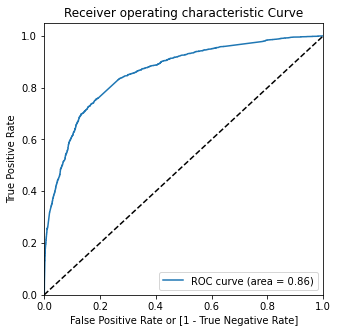

In [1296]:
col = col.drop('Lead Origin_API')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** P-value of column `Specialization_Operations Management` is more than 0.05. Lets try dropping this column.

### 9th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.6
Date:                Thu, 17 Jun 2021   Deviance:                       5845.2
Time:                        18:23:03   Pearson chi2:                 7.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

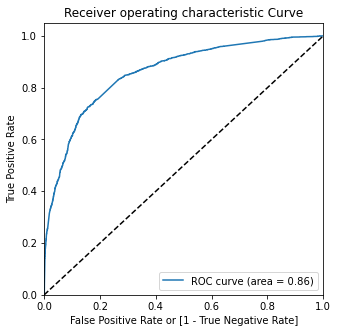

In [1297]:
col = col.drop('Specialization_Operations Management')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** P-value of column `Specialization_E-COMMERCE` is more than 0.05. 

### 10th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2923.8
Date:                Thu, 17 Jun 2021   Deviance:                       5847.7
Time:                        18:23:04   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

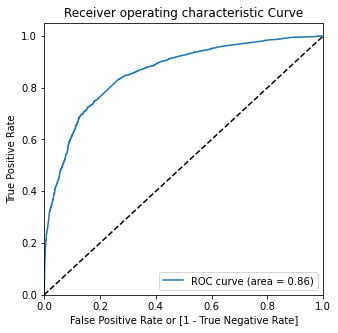

In [1298]:
col = col.drop('Specialization_E-COMMERCE')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** Column `Specialization_Rural and Agribusiness` has p-value more than 0.05. We can try dropping this column.

### 11th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2925.1
Date:                Thu, 17 Jun 2021   Deviance:                       5850.1
Time:                        18:23:04   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

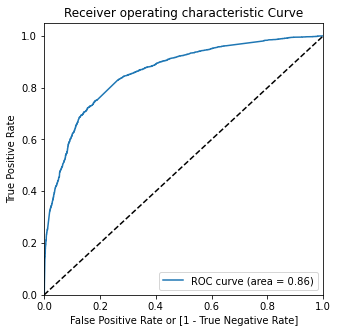

In [1299]:
col = col.drop('Specialization_Rural and Agribusiness')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`** Column `Specialization_Healthcare Management` has p-value more than o.05. Let's try dropping this column.

### 12th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2926.3
Date:                Thu, 17 Jun 2021   Deviance:                       5852.6
Time:                        18:23:05   Pearson chi2:                 7.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

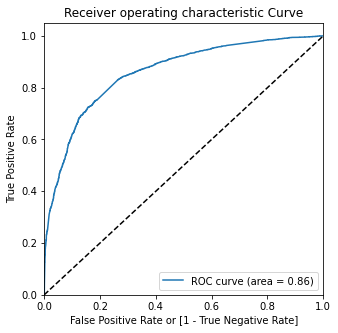

In [1300]:
col = col.drop('Specialization_Healthcare Management')
res,y_train_pred_final,confusion = build_model(col)

**`Inference:`**  Column `Specialization_IT Projects Management` has p-value more than 0.05. Let's try dropping this column.

### 13th Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.6
Date:                Thu, 17 Jun 2021   Deviance:                       5855.2
Time:                        18:23:06   Pearson chi2:                 7.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

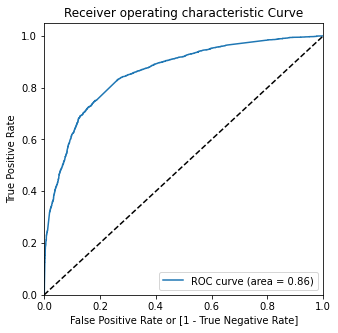

In [1301]:
col = col.drop('Specialization_IT Projects Management')
res,y_train_pred_final,confusion = build_model(col)

#### `Inference:`





- #### This is our final model. Here, we are good with VIF & p-value of all the selected features.

- #### Also Accuracy of overall model is `0.79` which is pretty good as well. 

 #### _Lets see the other metrices and conclude the model._

### Metrics beyond simply accuracy

In [1302]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1303]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.643146796431468

In [1304]:
# Let us calculate specificity
TN / float(TN+FP)

0.8895552223888056

In [1305]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.11044477761119441


In [1306]:
# positive predictive value 
print (TP / float(TP+FP))

0.782051282051282


In [1307]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8018018018018018


### Metrices values with cutoff 0.5 on train data:


- **`Sensitivity:`**  **0.64**


- **`Specificity:`**  **0.89**


- **`False Postive Rate:`**  **0.11**


- **`Positive Predictive value:`**  **0.78**


- **`Negative predictive value:`**  **0.80**



**`Remark`**: We have good value for Specificity, False Postive Rate, Positive Predictive value, Negative predictive value but less value for Sensitivity. 



### **_Let's find optimal cut off value to balance:_**

###  Finding Optimal Cutoff Point

**Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**

In [1308]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.302123,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.248758,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.348855,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.693990,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.302123,3934,0,1,1,1,1,0,0,0,0,0,0


In [1309]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.491651  0.985401  0.187406
0.2   0.2  0.700989  0.899027  0.578961
0.3   0.3  0.773036  0.827251  0.739630
0.4   0.4  0.800247  0.701946  0.860820
0.5   0.5  0.795609  0.643147  0.889555
0.6   0.6  0.784168  0.571371  0.915292
0.7   0.7  0.765615  0.480130  0.941529
0.8   0.8  0.737013  0.359286  0.969765
0.9   0.9  0.694187  0.208435  0.993503


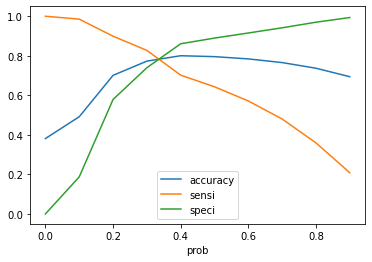

In [1310]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### `Remark:`  From the curve above, `0.3` is the optimum point to take it as a cutoff probability.

In [1311]:
# cutoff is 0.3
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.302123,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.248758,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.348855,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.693990,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.302123,3934,0,1,1,1,1,0,0,0,0,0,0,1


# Step 5 : Model Evaluation

### Metrices value with cutoff 0.3 on train data:

In [1312]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7730364873222016

In [1313]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2960, 1042],
       [ 426, 2040]], dtype=int64)

### Metrics beyond simply accuracy

In [1314]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1315]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8272506082725061

In [1316]:
# Let us calculate specificity
TN / float(TN+FP)

0.7396301849075462

In [1317]:
# Calculate false postive rate - predicting Converted when customer does not Converted
print(FP/ float(TN+FP))

0.26036981509245377


In [1318]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6619078520441272


In [1319]:
# Negative predictive value
print (TN / float(TN+ FN))

0.874187832250443


### Metrices value with cutoff 0.3 on train data:


- **`Accuracy:`**  **0.77**


- **`Sensitivity:`**  **0.827**


- **`Specificity:`**  **0.74**


- **`False Postive Rate:`**  **0.26**


- **`Positive Predictive value:`**  **0.66**


- **`Negative predictive value:`**  **0.87**


**`Remark:`**

- Accuracy of overall model is `77%` which is pretty good at cut-off 0.3 as well. 


- We have good value for Sensitivity, False Positive Rate, Positive Predictive value and Negative predictive value.


## Precision and Recall

In [1320]:
#Looking at the confusion matrix agai
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2960, 1042],
       [ 426, 2040]], dtype=int64)

In [1321]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision

- TP / (TP + FP)


In [1322]:
# calculate precision, Also known as positive predictive value
TP / float(TP + FP)

0.6619078520441272

### Recall

- TP / TP + FN

In [1323]:
# # calculate recall, Also known as True Positive Rate or sensitivity
TP / float(TP + FN)

0.8272506082725061

**Calculating same using sklearn**

In [1324]:
# calculate precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6619078520441272

In [1325]:
# calculate recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8272506082725061

**`Remark`**

- **Precision (also known as positive predictive value) : 0.66**


- **Recall (also known as true positive rate or sensitivity) : 0.827**

## Precision and Recall Curve

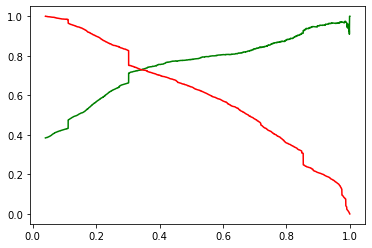

In [1326]:
# precision and recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**`Inference:`**

- Again we can see in the above precision recall curve, 0.3 is the optimum point to take it as a cut-off probability.


## Lead Score Calculation:

In [1327]:
# calculating lead score on train set
X_train.reset_index(drop=True, inplace=True)
y_train_pred = y_train_pred_final['Conversion_Probability']
y_train_pred.reset_index(drop=True, inplace=True)

In [1328]:
X_train_final = pd.concat([X_train,y_train_pred],axis = 1)
X_train_final['Lead Score'] = X_train_final['Conversion_Probability']*100

In [1329]:
X_train_final.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Conversion_Probability,Lead Score
0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.302123,30.212281
1,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.248758,24.875773
2,0.512365,-0.691418,0.092260,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.348855,34.885482
3,0.512365,1.365219,1.364995,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.693990,69.399000
4,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.302123,30.212281


# Step 6: Making predictions on the `Test Set`

**Scaling using trained scaler**

In [1330]:
X_test[leads_continuous_col] = scaler.transform(X_test[leads_continuous_col])

In [1331]:
# select feature for x_test
X_test1 = X_test[col]
X_test1.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Finance Management,Specialization_Hospitality Management,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Lead Add Form
4269,0.964504,1,0,0,0,0,0,0,0,0,0,0,0
2376,-0.885371,0,0,0,0,0,0,0,0,0,1,0,1
7766,-0.777416,0,0,1,0,0,0,0,0,0,0,1,0
9199,-0.885371,0,0,0,0,0,0,0,0,0,1,0,0
4359,-0.885371,0,0,0,0,0,0,0,0,0,1,0,1


In [1332]:
# add const to x_test
X_test_sm = sm.add_constant(X_test1)

**Making predictions on the test set**

In [1333]:
y_test_pred = res.predict(X_test_sm)
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.215656
2376,0.852647
7766,0.735049
9199,0.302123
4359,0.852647


In [1334]:
# Converting y_test to dataframe
y_test = pd.DataFrame(y_test)

In [1335]:
# Putting LeadID to index
y_test['LeadID'] = y_test.index

In [1336]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [1337]:
# Appending y_test and y_test_pred
y_test_pred_final = pd.concat([y_test, y_test_pred],axis=1)

In [1338]:
y_test_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.215656
1,1,2376,0.852647
2,1,7766,0.735049
3,0,9199,0.302123
4,1,4359,0.852647


In [1339]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Conversion_Probability'})


In [1340]:
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.3 else 0)

In [1341]:
y_test_pred_final.head()

,Converted,LeadID,Conversion_Probability,Predicted
0,1,4269,0.215656,0
1,1,2376,0.852647,1
2,1,7766,0.735049,1
3,0,9199,0.302123,1
4,1,4359,0.852647,1


In [1342]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.7752525252525253

In [1343]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion_test

array([[1234,  443],
       [ 180,  915]], dtype=int64)

In [1344]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [1345]:
# Let's see the sensitivity of our logistic regression model on test data
TP / float(TP+FN)

0.8356164383561644

In [1346]:
# Let us calculate specificity on test data
TN / float(TN+FP)

0.7358378056052475

In [1347]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.2641621943947525


In [1348]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6737849779086893


In [1349]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8727015558698727


### Metrices value with cutoff 0.3 on Test data:


- **`Accuracy:`**  **0.77**


- **`Sensitivity:`**  **0.835**


- **`Specificity:`**  **0.73**


- **`False Postive Rate:`**  **0.26**


- **`Positive Predictive value:`**  **0.67**


- **`Negative predictive value:`**  **0.87**


**`Remark:`**

- Accuracy of overall model is `77%` which is pretty good at cut-off 0.3 on test set as well. 


- We have good value for Sensitivity, False Positive Rate, Positive Predictive value and Negative predictive value. 


### Precision and Recall on Test Data

In [1350]:
# Precision
precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.6737849779086893

In [1351]:
# Recall 
recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.8356164383561644

**`Remark`**

- **Precision (also known as positive predictive value) : 0.67**


- **Recall (also known as true positive rate or sensitivity) : 0.83**

### Precision - Recall Curve


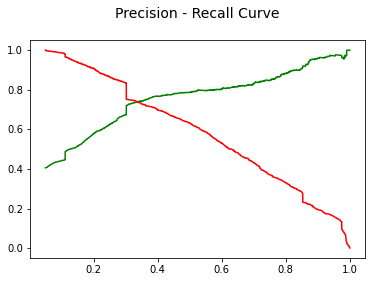

In [1352]:
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Conversion_Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision - Recall Curve\n',fontdict={'size':14})
plt.show()

### ROC curve on test data

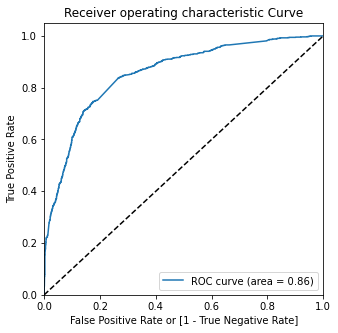

In [1353]:
# Draw ROC curve on test Data
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conversion_Probability)

**`Inference:`**  ROC curve looks good for test data covering `86%` area.

### Lead Score Calculation:

In [1354]:
# checking dimension of X_test
X_test.shape

(2772, 52)

In [1355]:
# checking dimension of y_test
y_test_pred.shape

(2772, 1)

In [1356]:
# reset index of X_test and y_test
X_test.reset_index(drop=True, inplace=True)
y_test_pred.reset_index(drop=True, inplace=True)

In [1357]:
# merging X_test and y_test_pred into x_test_Final
x_test_Final = pd.concat([X_test,y_test_pred], axis = 1)

In [1358]:
# checking dimension of x_test_Final
x_test_Final.shape

(2772, 53)

In [1359]:
# checking top 5 rows of final data frame x_test_Frame
x_test_Final.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,...,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,0
0,1.433341,0.964504,2.892276,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.215656
1,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.852647
2,0.512365,-0.777416,1.364995,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0.735049
3,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.302123
4,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.852647


In [1360]:
# Renaming the column 
x_test_Final= x_test_Final.rename(columns={ 0 : 'Conversion_Probability'})

In [1361]:
# calculating lead score on test set
x_test_Final['Lead Score'] = x_test_Final['Conversion_Probability'] *100

In [1362]:
x_test_Final.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Conversion_Probability,Lead Score
0,1.433341,0.964504,2.892276,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.215656,21.565583
1,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.852647,85.264688
2,0.512365,-0.777416,1.364995,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0.735049,73.504852
3,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.302123,30.212281
4,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.852647,85.264688


### `Conclusion:` 


- **Lead score indicates the score for every prospect, which signifies the percentage of chances to convert.** 


- **This will help sales team to identify the potential/hot leads which has high change of converting, meanwhile save effort.**

## Final Model Summary:

#### **Considering Optimal cut off : 0.3**

### Train Data:

- **`Overall Accuracy:`**  **0.77**


- **`Sensitivity:`**  **0.827**


- **`Specificity:`**  **0.74**


- **`False Postive Rate:`**  **0.26**


- **`Positive Predictive value:`**  **0.66**


- **`Negative predictive value:`**  **0.87**


- **`Precision:`**  **0.66**


- **`Recall:`** **0.827**


### Test Data:


- **`Overall Accuracy:`**  **0.77** 


- **`Sensitivity:`**  **0.835**


- **`Specificity:`**  **0.73**


- **`False Postive Rate:`**  **0.26**


- **`Positive Predictive value:`**  **0.67**


- **`Negative predictive value:`**  **0.87**



- **`Precision:`**  **0.67** 



- **`Recall:`** **0.83**

### Features Selected By Model

- What is your current occupation_Working Professional
- Lead Origin_Lead Add Form                           
- Lead Source_Welingak Website                        
- What is your current occupation_Unemployed          
- Total Time Spent on Website                         
- What is your current occupation_Student             
- Specialization_Finance Management                   
- Lead Source_Google                                  
- Specialization_Hospitality Management               
- Lead Source_Organic Search                          
- Lead Source_Direct Traffic                          
- Lead Source_Facebook                                
- Lead Source_Referral Sites                          


<h1><font color='red'>Conclusion: </color></h1>

- **Our Logistic Regression Model is decent and accurate enough, with near `77% Accuracy` and `83% Sensitivity`.**



 - **X Education Company needs to focus on following key aspects to improve the overall conversion rate:**
     
     - Increase user engagement on Welingak website.
     
     - Approach to Working Professionals who whants to gain extra knowledge, since this helps in higher conversion.
     
     - Focus on lead form on the website.
     
     - Add quality contents on website so that user will spent more time exploring information about courses.